<a href="https://colab.research.google.com/github/SinothileB/Project-2--part1/blob/main/Project2_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the approved dataset you proposed for Project 2 - Part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

## Stroke Prediction Dataset

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path= "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df=pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Deleted unnecessary columns.

In [ ]:
#Drop Id , as its a unique column that won't help with any thing
df  = df.drop(columns='id')

Deleted duplicate rows.

In [ ]:
df.duplicated().sum()

0

Identified and addressed missing values.

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.isna().sum().sum()

201

Handle missings in the categorical

In [ ]:
cat_o = df.select_dtypes("object").columns
cat_o


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
df[cat_o] = df[cat_o].fillna("MISSING")

In [ ]:
#Check again
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
cat_n = df.select_dtypes("number").columns
# use the list of num columns to fill null values with -1
df[cat_n] = df[cat_n].fillna(-1)

In [ ]:
#Check again
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [ ]:
#Find and fix any inconsistent categories of data
# loop through the list of string columns
for col in cat_o:

  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  # Print an empty line for readability
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Identified outliers.

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,27.717397,0.048728
std,22.612647,0.296607,0.226063,45.283560,9.645369,0.215320
min,0.080000,0.000000,0.000000,55.120000,-1.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



##Produced univariate visuals for the target and all features.

Target column is Stroke - I visualised it at the end

###Univariate for
Gender

Text(0.5, 1.0, 'Female vs. Males,vs Other.')

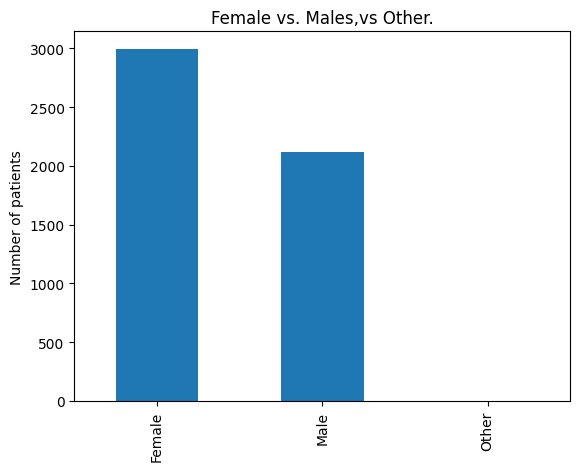

In [ ]:
#1) Plot the counts for the number of patients per Gender
value_counts = df["gender"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title("Female vs. Males,vs Other.")

Gender that appears most here is females

Univariate :

Visuals for Age

Text(0.5, 1.0, 'age')

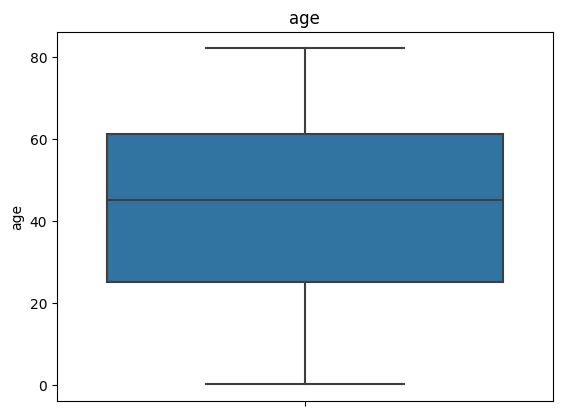

In [ ]:
#Age
# Create a boxplot of Age of a patient
ax=sns.boxplot(data =df, y='age')
ax.set_title("age")


no outliers

Text(0.5, 1.0, 'Distribution of Age')

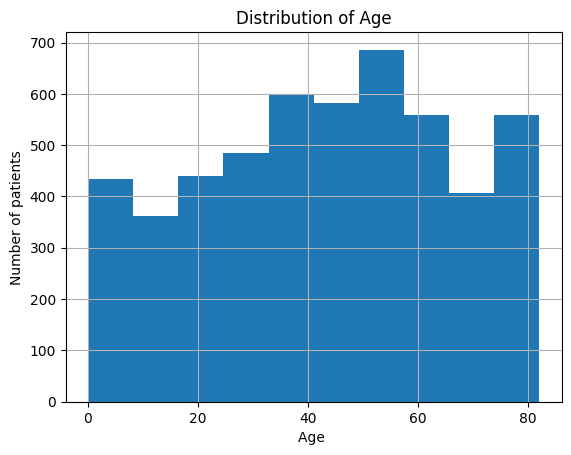

In [ ]:
#Histogram
#2) Plot a histogram of the distribution of Age.
ax = df["age"].hist()
ax.set_xlabel("Age ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of Age")

Age between 50 and 57 Occurs most in this data set

##Univariate for
hypertension

Text(0.5, 1.0, 'Distribution of hypertension')

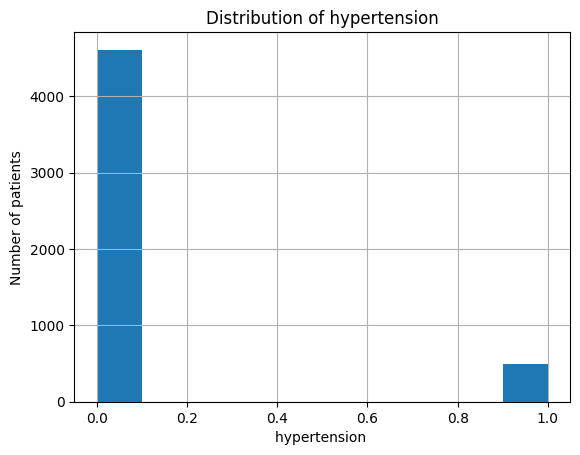

In [ ]:
#Histogram
#2) Plot a histogram of the distribution of hypertension.
ax = df["hypertension"].hist()
ax.set_xlabel("hypertension ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of hypertension")

Most patients do not suffer from hypertension(0 means no hypertension , 1 means suffers hypertension)

Heart disease

Text(0.5, 1.0, 'Distribution of heart disease')

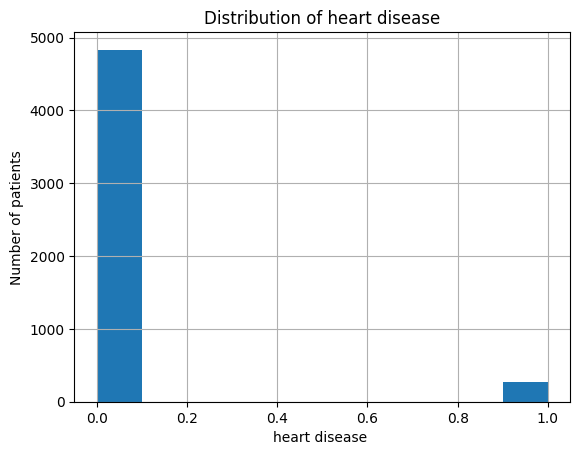

In [ ]:
#Histogram
#2) Plot a histogram of the distribution of heart_disease.
ax = df["heart_disease"].hist()
ax.set_xlabel("heart disease ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of heart disease")

Most patients do not suffer from heart disease(0 means no heart disease , 1 means suffers heart disease

###ever_married

Text(0.5, 1.0, 'Ever married status')

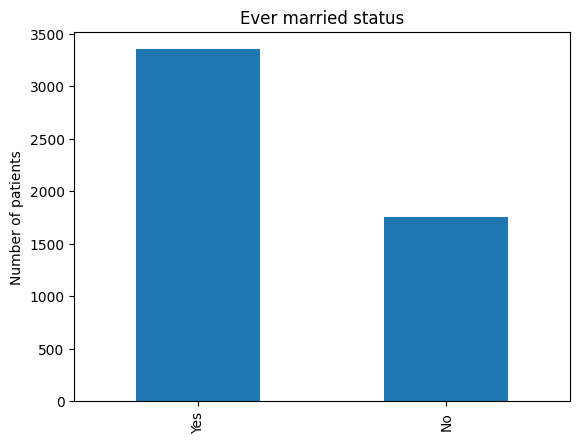

In [ ]:
#Plot the counts for the number of patients per Marital status
value_counts = df["ever_married"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title("Ever married status")

Most patients have been married

##Work Type

Text(0.5, 1.0, ' Distribution of Work type')

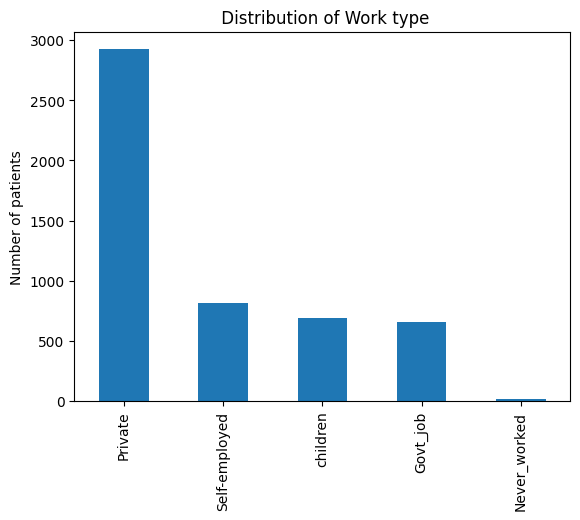

In [ ]:
#Plot the counts for the number of patients per work_type
value_counts = df["work_type"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of Work type")

Most Patients are Privately employed

Least Patients never worked

###Residence_type

Text(0.5, 1.0, ' Distribution of residence_type ')

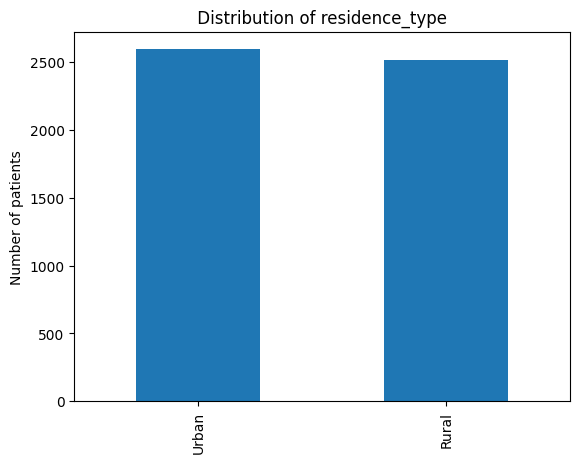

In [ ]:
#Plot the counts for the number of patients per residence_type
value_counts = df["Residence_type"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of residence_type ")

More patients are from Urban area

###avg_glucose_level

Text(0.5, 1.0, 'average glucose_level')

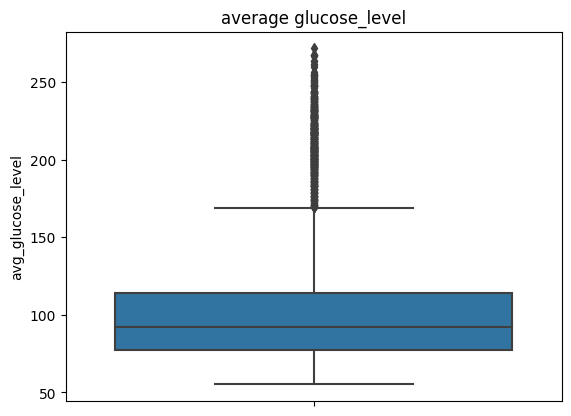

In [ ]:
# Create a boxplot of avg_glucose_level of a patient
ax=sns.boxplot(data =df, y='avg_glucose_level')
ax.set_title("average glucose_level")


Looks like there are some outliers

Text(0.5, 1.0, 'Distribution of average glucose_level')

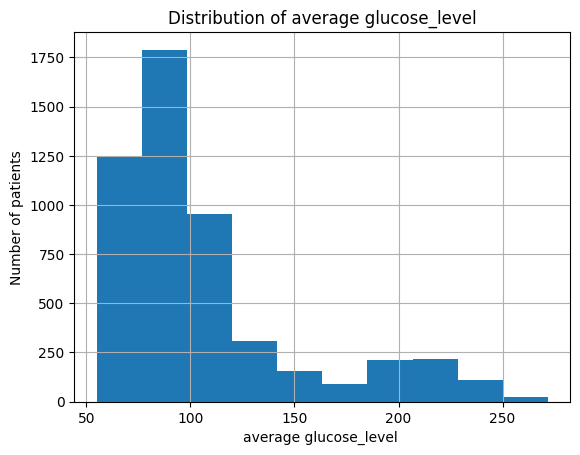

In [ ]:
#Histogram
#2) Plot a histogram of the distribution of avg_glucose_level.
ax = df["avg_glucose_level"].hist()
ax.set_xlabel("average glucose_level ")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of average glucose_level")

Average of 50 to 100 appeared most

###BMI

Text(0.5, 1.0, 'bmi')

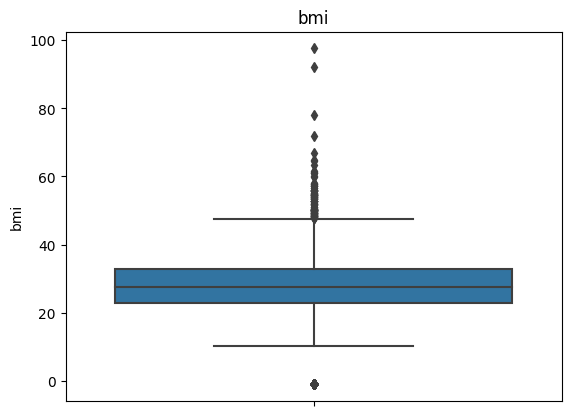

In [ ]:
# Create a boxplot of BMI of a patient
ax=sns.boxplot(data =df, y='bmi')
ax.set_title("bmi")

Bmi has some outliers

###Smoking Status

Text(0.5, 1.0, ' Distribution of smoking_status ')

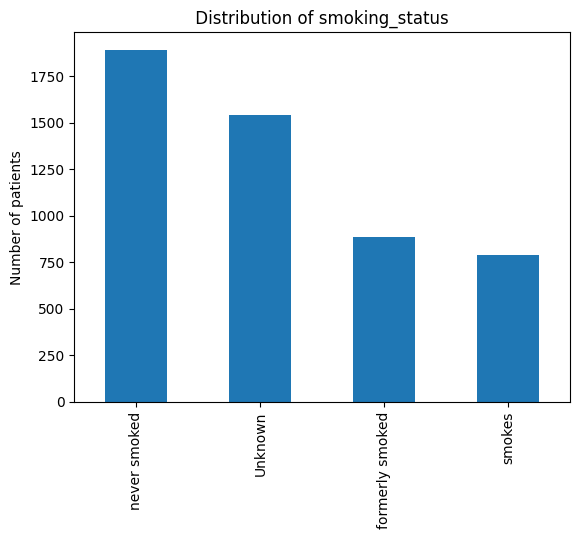

In [ ]:
#Plot the counts for the number of patients per smoking_status
value_counts = df["smoking_status"].value_counts()
ax = value_counts.plot(kind='bar')
ax.set_ylabel("Number of patients")
ax.set_title(" Distribution of smoking_status ")

Data has more patience that have never smoked

###Stroke

Text(0.5, 1.0, 'Distribution of stroke')

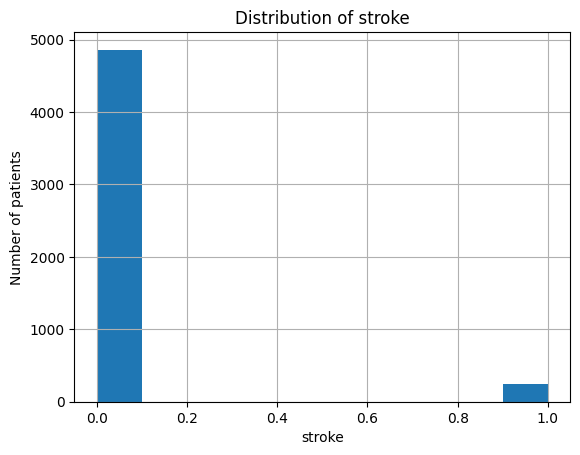

In [ ]:
#Histogram
#2) Plot a histogram of the distribution of stroke.
ax = df["stroke"].hist()
ax.set_xlabel("stroke")
ax.set_ylabel("Number of patients")
ax.set_title("Distribution of stroke")

More patients have not suffered from the stroke(0 means have not suffered, 1 means have suffered the stroke)

#Part 3



For this part of the project, you will continue your data exploration by:

1.Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

2.Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

1.Heatmap

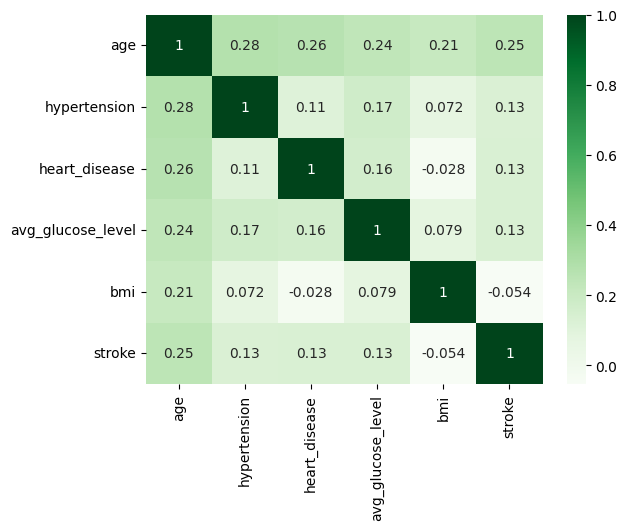

In [ ]:
#Heatmap to view the correlation between features.
# Get correlations
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Greens', annot = True);

Age and stroke has a positive relationship , The older the patient, the more chances of a stroke.

Stroke and BMI have a negative relationship.

2.Creating multivariate (multiple variables) exploratory visualizations to understand your data and search for trends.

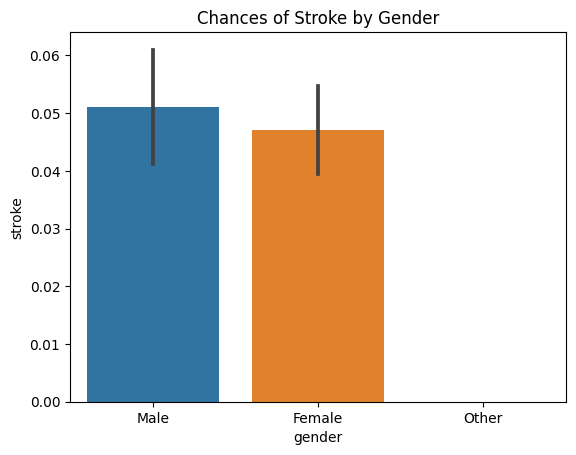

In [ ]:
#2) Plot a barplot
ax= sns.barplot(data=df,x='gender',y='stroke')
ax.set_title("Chances of Stroke by Gender");

It seems to Occure more in Males than females

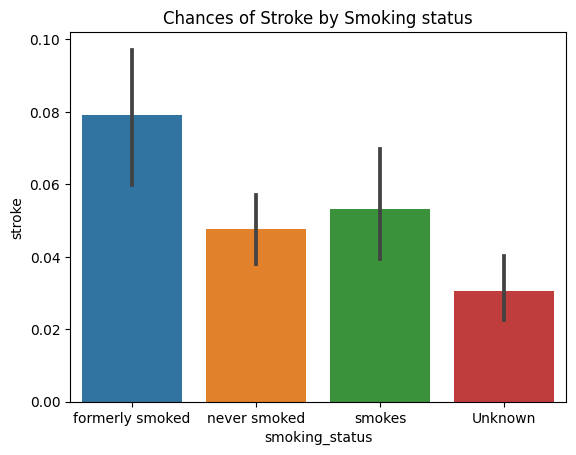

In [ ]:
#2) Plot a barplot
ax= sns.barplot(data=df,x='smoking_status',y='stroke')
ax.set_title("Chances of Stroke by Smoking status");

Those that formerly smoked are at high chances of stroke

#Part4

##Prepare the data appropriately for modeling

#Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

imports

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
# Set pandas as the default output for sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output='pandas')


In [ ]:
#Make another copy after cleaning
df2_copy=df.copy()

Target is stroke: 1 if the patient had a stroke or 0 if not

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,-1.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


define features X and Target Y

In [ ]:
X= df.drop(columns=['stroke']	)
y = df['stroke']

Train Test Split

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
# Preview training data
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4505,Female,60.0,1,0,Yes,Private,Urban,234.50,43.7,never smoked
3576,Male,41.0,0,0,Yes,Private,Rural,83.97,28.5,formerly smoked
3032,Male,52.0,0,0,Yes,Private,Urban,87.51,30.5,formerly smoked
1867,Female,55.0,0,0,Yes,Private,Rural,63.47,27.8,Unknown
494,Female,55.0,0,0,Yes,Private,Rural,111.19,39.7,formerly smoked


NUMERIC DATA

Change -1 to NAN , Since we want to use impute to handle missing values

In [ ]:
df['bmi'] = df['bmi'].replace(-1, np.NaN)

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

I'm using mean startegy because the bmi which has missing values has no outliers

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# instantiate preprocessors
impute_mean= SimpleImputer(strategy='mean')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_mean, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

Numeric Columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'))

Categotical - No Ordinal

In [ ]:
# Defining list of nominal features
ohe_cols = X_train.select_dtypes('object').columns
print("Nominal:", ohe_cols)
# Instantiate the individual preprocessors, use missing to impute
impute_na = SimpleImputer(strategy='constant', fill_value = "MISSING")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

Nominal: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

Instantiate the column transformer

In [ ]:
col_transformer = ColumnTransformer([num_tuple,  ohe_tuple],
                                    remainder='drop',
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                  verbose_feature_names_out=False)

Create and compare at least 2 different model types to predict stroke

###1) Logistic Regression

a) Start by creating and evaluating a default logistic regression model using appropriate metrics and a confusion matrix

In [ ]:
#Make an instance of the model with default parameters
logreg = LogisticRegression()
logreg_pipe = make_pipeline(col_transformer, logreg)
#Model is learning the relationship between X and y
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [ ]:
# Get predictions for calculating score
train_preds = logreg_pipe.predict(X_train)
test_preds = logreg_pipe.predict(X_test)

In [ ]:
# Calculate accuracy
print(accuracy_score(y_train, train_preds))
print(accuracy_score(y_test, test_preds))

0.9558977035490606
0.9381846635367762


Logistic reg model is doing good, it is able to predict 93% of test data set correctly

In [ ]:
#Do classification report and Confusion Matrix
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.03      0.05        80

    accuracy                           0.94      1278
   macro avg       0.72      0.51      0.51      1278
weighted avg       0.91      0.94      0.91      1278



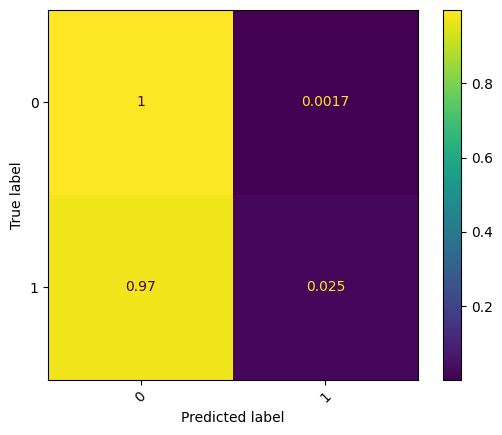

In [ ]:
#Logistic regression confusion Metrics
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',
xticks_rotation=45)

The metrics show that it is not a good model as it predicted 100% of true negative values , meaning the ones were patients will not be likely to have stroke,

but then it predicted 95% of false negatives(Patients that will be seen having stroke while they are not)

-b)Hypertune the  Logistic Model - use GridSearchCV

In [ ]:
#Check what can be tuned
logreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                   ('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                         

In [ ]:
param_grid = {
        'logisticregression__verbose': [1, 5, 10,15,20],
        'logisticregression__class_weight':[None,'balanced']}

In [ ]:
logRegG = GridSearchCV(logreg_pipe, param_grid, cv=5,n_jobs=-1, verbose=1)
logRegG.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__class_weight': [None, 'balanced'],
                         'logisticregression__verbose': [1, 5, 10, 15, 20]},
             verbose=1)

In [ ]:
# Obtain best parameters
best_model = logRegG.best_params_
best_model

{'logisticregression__class_weight': None, 'logisticregression__verbose': 1}

In [ ]:
#Make an instance of the model with default parameters
logregbest = LogisticRegression(class_weight = None, verbose= 1)
lin_reg_pipe = make_pipeline(col_transformer, logregbest)
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(verbose=1))])

In [ ]:
# Get predictions for calculating score
train_predsb = lin_reg_pipe.predict(X_train)
test_predsb = lin_reg_pipe.predict(X_test)
# Calculate accuracy
print(accuracy_score(y_train, train_predsb))
print(accuracy_score(y_test, test_predsb))

0.9553757828810021
0.9374021909233177


no improvement on the accuracy scores

Do classification report and Confusion Matrix to show this

In [ ]:
print(classification_report(y_test,test_predsb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.03      0.05        80

    accuracy                           0.94      1278
   macro avg       0.72      0.51      0.51      1278
weighted avg       0.91      0.94      0.91      1278



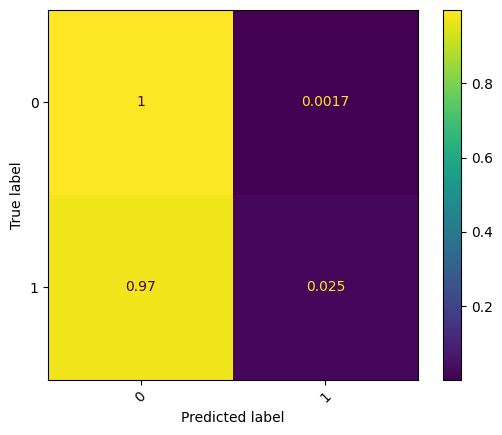

In [ ]:
#Logistic regression confusion Metrics
ConfusionMatrixDisplay.from_predictions(y_test, test_predsb,normalize='true',xticks_rotation=45)


metrics is still the same even with hypertuning

Now Try another Model just to see if the score can be improved

1) Random Forest

*a*) Start by creating and evaluating a default random forest model using appropriate metrics and a confusion matrix

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(col_transformer, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# Obtain predictions
train_predsRf = rf_pipe.predict(X_train)
test_predsRF = rf_pipe.predict(X_test)
#Calculate classification accuracy
train_score = accuracy_score(y_train, train_predsRf)
test_score = accuracy_score(y_test, test_predsRF)
print (f'The training accuracy is {train_score}.')
print (f'The testing accuracy is {test_score}.')

The training accuracy is 1.0.
The testing accuracy is 0.9381846635367762.


This model is an overfit , that perfoms too good on the training data , the test data improved by a little bit.

In [ ]:
#Classification Report
print(classification_report(y_test,test_predsRF))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278



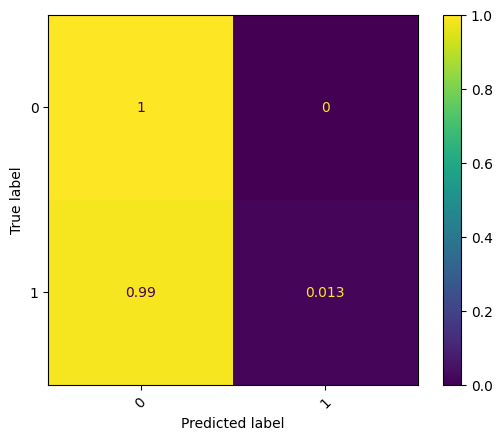

In [ ]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_predsRF, normalize='true',
xticks_rotation=45)

Still not good model as it shows that 99% will be seen as not likely to have stroke , while they are , so they are at risk becuase they might not be given medication while they need it.

Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results

Do PCA with KNN model

In [ ]:
transformer = make_pipeline(col_transformer, PCA(n_components=.95))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Knn1 = KNeighborsClassifier()
# Create a modeling pipeline
Knn1_pipe = make_pipeline(transformer, Knn1)
Knn1_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(fill_value='MISSING',
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                    verbose_feature_names_out=False)),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Evaluate Model

In [ ]:
print('Training accuracy:', Knn1_pipe.score(X_train, y_train))
print('Testing accuracy:', Knn1_pipe.score(X_test, y_test))

Training accuracy: 0.9569415448851775
Testing accuracy: 0.9358372456964006


No Model perfomed well, becuase of False Negatives not decreasing.

##Check if data is balanced

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

Data is not balanced , Trying balancing data and one model for improvement

In [ ]:
from imblearn.over_sampling import SMOTE

Using smote because we do not want to undersample since we might remove useful data

In [ ]:
smote = SMOTE()
rf = RandomForestClassifier(random_state=42)
rf_pipe = Pipeline(steps=[('transform',col_transformer), ('smote',smote), ('dt',rf)])
#rf_pipe = Pipeline(col_transformer, smote,rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()),
                ('dt', RandomForestClassifier(random_state=42))])

In [ ]:
# Obtain predictions
train_predsRf2 = rf_pipe.predict(X_train)
test_predsRF2 = rf_pipe.predict(X_test)
#Calculate classification accuracy
train_score2 = accuracy_score(y_train, train_predsRf2)
test_score2 = accuracy_score(y_test, test_predsRF2)
print (f'The training accuracy is {train_score2}.')
print (f'The testing accuracy is {test_score2}.')

The training accuracy is 1.0.
The testing accuracy is 0.9256651017214398.


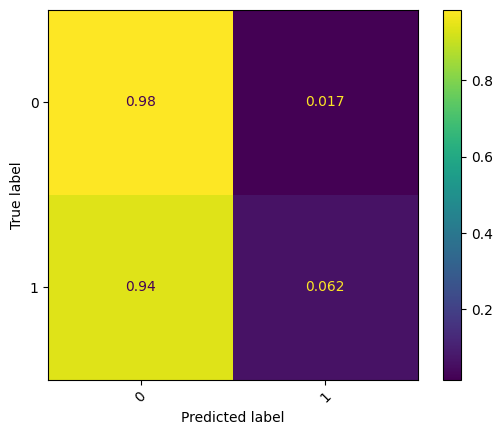

In [ ]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_predsRF2, normalize='true',
xticks_rotation=45)

Still high predictions of people being seen as not having stroke while there .

In [175]:
#Make an instance of the model with default parameters
logreg = LogisticRegression()
logreg_pipe = Pipeline(steps=[('transform',col_transformer), ('smote',smote), ('dt',logreg)])
#Model is learning the relationship between X and y
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()), ('dt', LogisticRegression())])

In [176]:
# Get predictions for calculating score
train_preds = logreg_pipe.predict(X_train)
test_preds = logreg_pipe.predict(X_test)

In [177]:
# Calculate accuracy
print(accuracy_score(y_train, train_preds))
print(accuracy_score(y_test, test_preds))

0.75
0.7543035993740219


In [180]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1198
           1       0.16      0.71      0.27        80

    accuracy                           0.75      1278
   macro avg       0.57      0.73      0.56      1278
weighted avg       0.92      0.75      0.82      1278



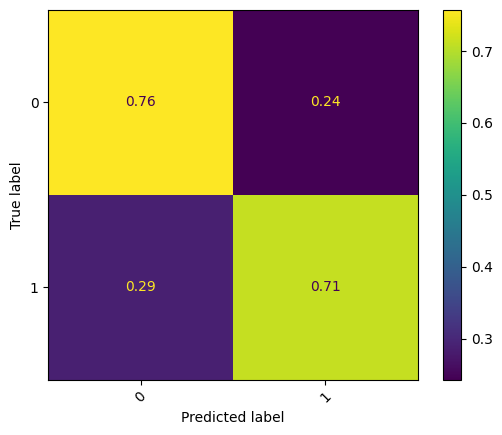

In [179]:
#Logistic regression confusion Metrics
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',xticks_rotation=45)

Model is balanced

Much improvement here as the false negatives that we are worried about  decreased to 30% but False positives went up to 24%, Meaning we will diagnose people who are not having stroke as having it.

This is still not a good Model but it is better than all of the other ones